## 1.4.3 Geometric Transformations of Images

## Transformations

### Scaling

In [2]:
import cv2
import numpy as np

In [3]:
img = cv2.imread('sIMG_2180.jpg')

In [4]:
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

In [5]:
res.shape

(1536, 2048, 3)

In [6]:
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)
cv2.namedWindow('res', cv2.WINDOW_AUTOSIZE)
cv2.imshow('res',res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Translation

In [9]:
img = cv2.imread('ml.jpg',0)
rows,cols = img.shape
x = 50
y = 100
M = np.float32([[1,0,y],[0,1,x]])
dst = cv2.warpAffine(img,M,(cols*2,rows*2))
dst = cv2.line(dst,(0,0),(10,150),(255,0,0),1)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotate

In [10]:
img = cv2.imread('ml.jpg',0)
rows,cols = img.shape

In [22]:
M = cv2.getRotationMatrix2D((0,0),45,1)
print(M)

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


In [23]:
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('oimg',img)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t+=1
    M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

### Affine Transformation

In [25]:
from matplotlib import pyplot as plt

In [26]:
img = cv2.imread('R.png')
rows,cols,ch = img.shape

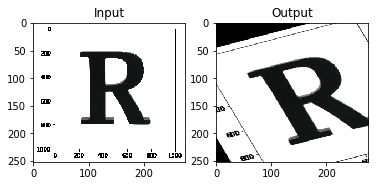

In [27]:
pts1 = np.float32([[40,10],[257,10],[40,228]])
pts2 = np.float32([[85,52],[257,10],[40,228]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [ ]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t+=1
    cv2.imshow('image',dst)
    pts1 = np.float32([[x,y],[257,10],[40,228]])
    pts2 = np.float32([[x,y],[257,10],[40,228]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

### Perspective Transform

In [35]:
img = cv2.imread('dsu.jpg')
img.shape

(720, 540, 3)

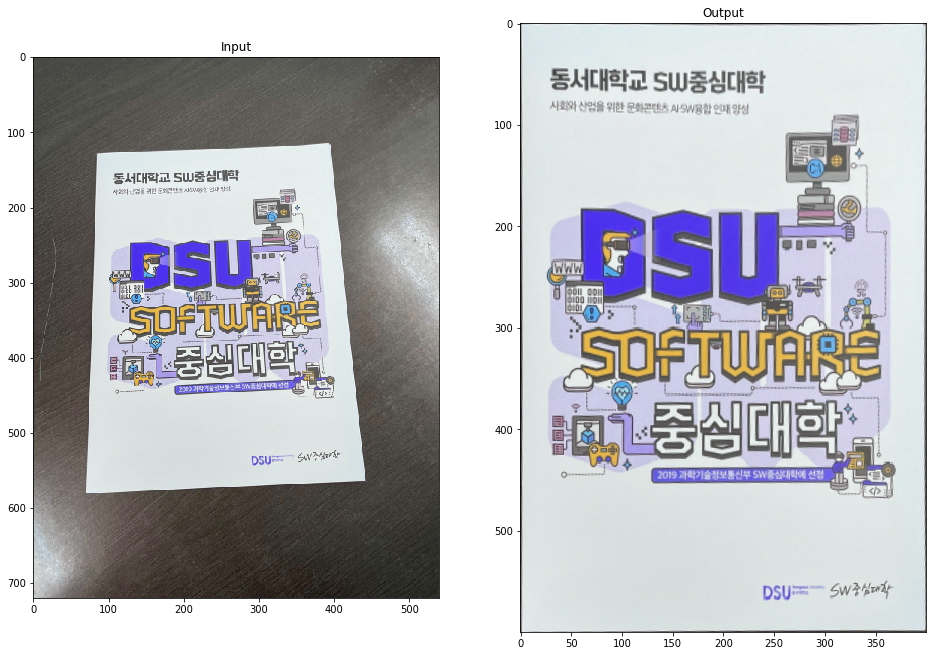

In [40]:
rows,cols,ch = img.shape
pts1 = np.float32([[84,129],[396,116],[69,581],[443,566]])
pts2 = np.float32([[0,0],[400,0],[0,600],[400,600]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(400,600))
plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()